In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import joblib


In [5]:
df = pd.read_csv("./dataset/visa_dataset.csv")
df.head()


,age,home_country,destination_country,education,employment,monthly_income,travel_purpose,travel_history,criminal_record,english_level,visa_approved
0,30,Brazil,Germany,HighSchool,Unemployed,59292,Study,0,0,High,0
1,32,Mexico,Australia,HighSchool,Unemployed,76528,Business,0,0,Medium,0
2,36,Nigeria,Canada,Masters,Unemployed,82634,Study,1,0,Low,0
3,37,India,Germany,HighSchool,Employed,23012,Tourist,0,0,Medium,0
4,42,Mexico,UK,Bachelors,Unemployed,41811,Business,3,1,Medium,0


In [8]:
df["visa_approved"].value_counts(normalize=True)

visa_approved
0    0.610547
1    0.389453
Name: proportion, dtype: float64

In [12]:
encode_cols = [
    "home_country",
    "destination_country",
    "education",
    "employment",
    "travel_purpose",
    "english_level"
]

le = LabelEncoder()

for col in encode_cols:
    df[col] = le.fit_transform(df[col])
print("Encoding complete.")

Encoding complete.


In [14]:
X = df.drop("visa_approved", axis=1)
y = df["visa_approved"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("Data split into training and testing sets.")


Data split into training and testing sets.


In [20]:
model = RandomForestClassifier(
    n_estimators=120,
    max_depth=5,
    min_samples_split=6,
    min_samples_leaf=4,
    random_state=42
)

model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


In [22]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.898440471662229

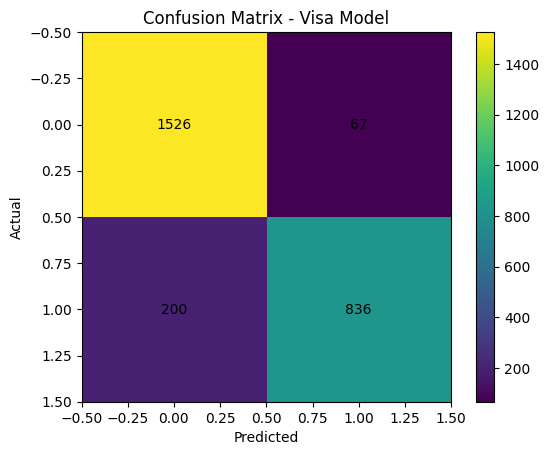

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Visa Model")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


In [26]:
joblib.dump(model, "visa_model.pkl")
print("Model saved as visa_model.pkl")

Model saved as visa_model.pkl


In [27]:
joblib.dump(le, "label_encoder.pkl")
print("Label encoder saved as label_encoder.pkl")

Label encoder saved as label_encoder.pkl
